In [ ]:
# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# ============================================================================
# 2. DATA LOADING
# ============================================================================

print("="*80)
print("LOADING DATASET")
print("="*80)

# Load dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

print(f"\n✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape}")
print(f"  Rows: {df.shape[0]}")
print(f"  Columns: {df.shape[1]}")

# Display first rows
print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
print(df.head())

LOADING DATASET

✓ Dataset loaded successfully!
  Shape: (7043, 21)
  Rows: 7043
  Columns: 21

FIRST 5 ROWS
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber 


EXPLORATORY DATA ANALYSIS

[1] Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Co

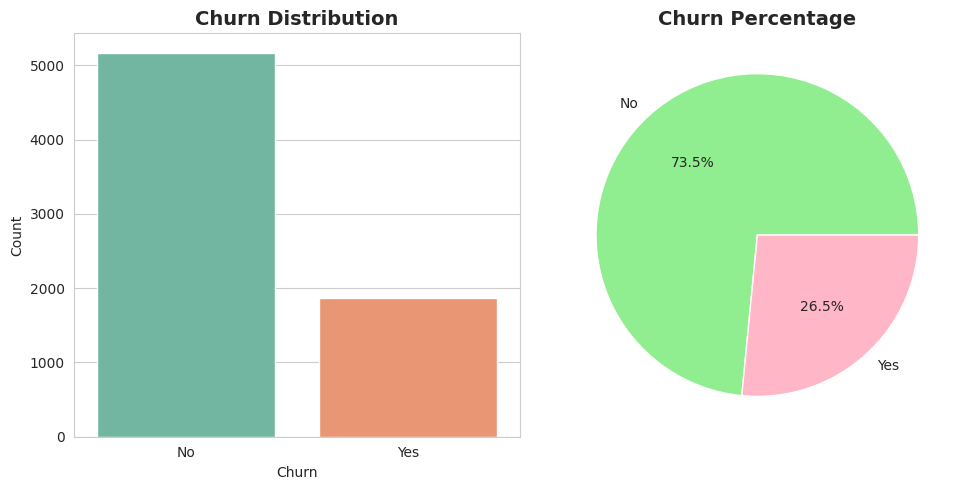


[6] Numerical Features Analysis:
----------------------------------------
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


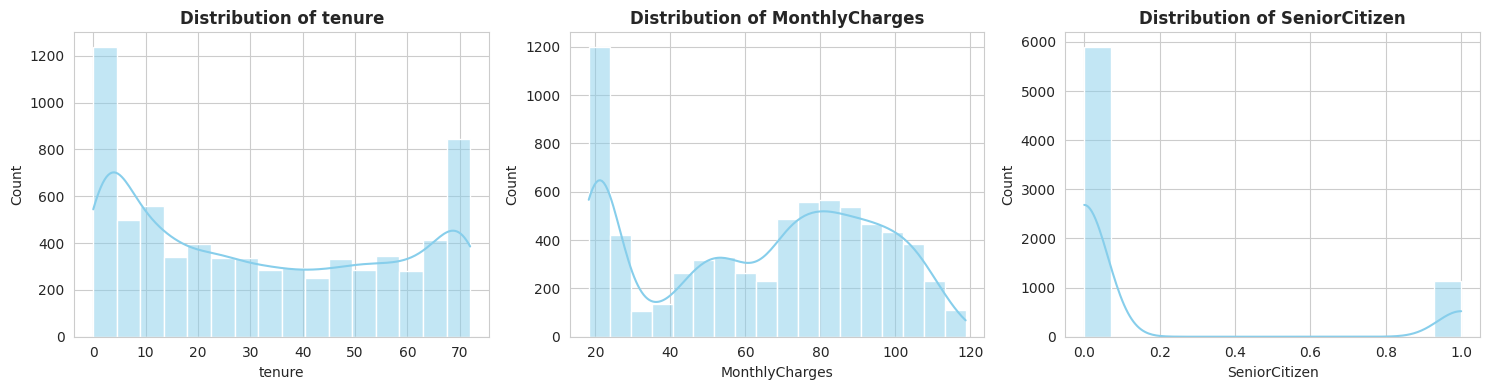


[7] Categorical Features Analysis:
----------------------------------------
Categorical columns (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']...


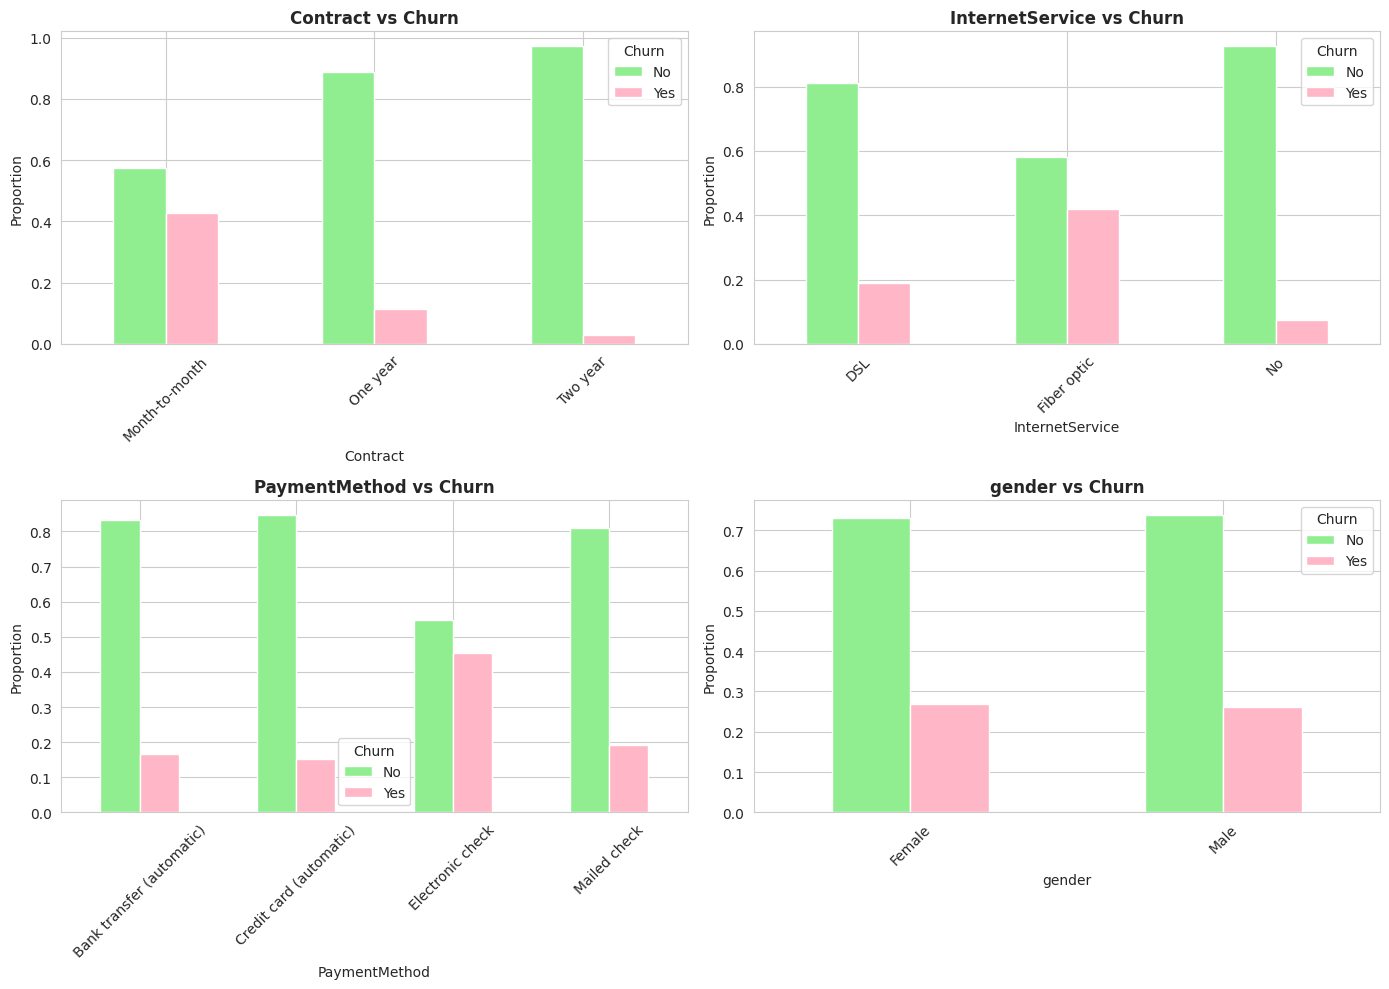


[8] Correlation with Target:
----------------------------------------
Churn_encoded     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn_encoded, dtype: float64


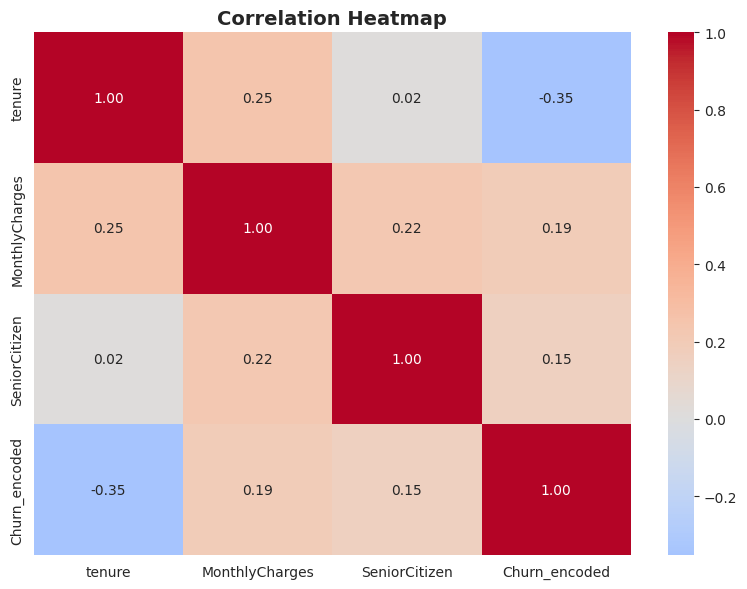

In [ ]:
# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# --- 3.1 Info Dataset ---
print("\n[1] Dataset Info:")
print("-" * 40)
df.info()

# --- 3.2 Statistical Summary ---
print("\n[2] Statistical Summary:")
print("-" * 40)
print(df.describe())

# --- 3.3 Missing Values ---
print("\n[3] Missing Values:")
print("-" * 40)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_table[missing_table['Missing Count'] > 0])

if missing.sum() == 0:
    print("✓ No missing values found!")

# --- 3.4 Data Types Check ---
print("\n[4] Data Types:")
print("-" * 40)
print(df.dtypes.value_counts())

# --- 3.5 Target Variable Distribution ---
print("\n[5] Target Variable (Churn) Distribution:")
print("-" * 40)
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print("\nPercentage:")
print(churn_pct)

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#90EE90', '#FFB6C6'])
plt.title('Churn Percentage', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

# --- 3.6 Numerical Features Analysis ---
print("\n[6] Numerical Features Analysis:")
print("-" * 40)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(['tenure', 'MonthlyCharges', 'SeniorCitizen']):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
plt.tight_layout()
plt.show()

# --- 3.7 Categorical Features Analysis ---
print("\n[7] Categorical Features Analysis:")
print("-" * 40)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove ID
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')  # Remove target
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols[:5]}...")

# Top categorical features vs Churn
top_cats = ['Contract', 'InternetService', 'PaymentMethod', 'gender']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(top_cats):
    if col in df.columns:
        pd.crosstab(df[col], df['Churn'], normalize='index').plot(
            kind='bar', ax=axes[idx], color=['#90EE90', '#FFB6C6']
        )
        axes[idx].set_title(f'{col} vs Churn', fontweight='bold')
        axes[idx].set_ylabel('Proportion')
        axes[idx].legend(title='Churn', labels=['No', 'Yes'])
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- 3.8 Correlation Analysis ---
print("\n[8] Correlation with Target:")
print("-" * 40)

# Create a copy for correlation
df_corr = df.copy()

# Encode target for correlation
df_corr['Churn_encoded'] = (df_corr['Churn'] == 'Yes').astype(int)

# Select only numerical columns
num_cols_for_corr = ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Churn_encoded']
correlation = df_corr[num_cols_for_corr].corr()['Churn_encoded'].sort_values(ascending=False)
print(correlation)

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr[num_cols_for_corr].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# 4. DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# --- 4.1 Handle TotalCharges (String to Numeric) ---
print("\n[1] Fix TotalCharges Data Type:")
print("-" * 40)

print(f"Original dtype: {df['TotalCharges'].dtype}")

# Convert to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values created
total_charges_nan = df['TotalCharges'].isnull().sum()
print(f"NaN values after conversion: {total_charges_nan}")

if total_charges_nan > 0:
    print(f"Filling {total_charges_nan} NaN values with median...")
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
    print("✓ NaN values filled!")

print(f"New dtype: {df['TotalCharges'].dtype}")

# --- 4.2 Drop customerID ---
print("\n[2] Drop Unnecessary Columns:")
print("-" * 40)
df_processed = df.drop('customerID', axis=1)
print("✓ Dropped: customerID")

# --- 4.3 Encode Target Variable ---
print("\n[3] Encode Target Variable:")
print("-" * 40)
df_processed['Churn'] = (df_processed['Churn'] == 'Yes').astype(int)
print("✓ Churn encoded: Yes=1, No=0")
print(f"  Class distribution: {df_processed['Churn'].value_counts().to_dict()}")

# --- 4.4 Handle Categorical Features ---
print("\n[4] Encode Categorical Features:")
print("-" * 40)

# Get categorical columns
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features to encode: {categorical_features}")

# Binary encoding for binary features
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_features:
    if col in df_processed.columns:
        df_processed[col] = (df_processed[col] == 'Yes').astype(int)
        print(f"  ✓ {col}: encoded to 0/1")

# Handle MultipleLines (has 'No phone service')
if 'MultipleLines' in df_processed.columns:
    df_processed['MultipleLines'] = df_processed['MultipleLines'].replace('No phone service', 'No')
    df_processed['MultipleLines'] = (df_processed['MultipleLines'] == 'Yes').astype(int)
    print(f"  ✓ MultipleLines: encoded to 0/1")

# Handle internet service related features
internet_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies']
for col in internet_features:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].replace('No internet service', 'No')
        df_processed[col] = (df_processed[col] == 'Yes').astype(int)
        print(f"  ✓ {col}: encoded to 0/1")

# One-hot encoding for multi-class features
multi_class_features = ['InternetService', 'Contract', 'PaymentMethod']
df_processed = pd.get_dummies(df_processed, columns=multi_class_features, drop_first=True)
print(f"  ✓ One-hot encoded: {multi_class_features}")

print(f"\nFinal shape after encoding: {df_processed.shape}")

# --- 4.5 Feature Scaling ---
print("\n[5] Feature Scaling:")
print("-" * 40)

# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
X[numerical_features] = scaler.fit_transform(X[numerical_features])
print(f"✓ Scaled features: {numerical_features}")

# --- 4.6 Train-Test Split ---
print("\n[6] Train-Test Split:")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Split completed!")
print(f"  Training set: {X_train.shape}")
print(f"  Testing set: {X_test.shape}")
print(f"  Train target distribution: {y_train.value_counts().to_dict()}")
print(f"  Test target distribution: {y_test.value_counts().to_dict()}")


DATA PREPROCESSING

[1] Fix TotalCharges Data Type:
----------------------------------------
Original dtype: object
NaN values after conversion: 11
Filling 11 NaN values with median...
✓ NaN values filled!
New dtype: float64

[2] Drop Unnecessary Columns:
----------------------------------------
✓ Dropped: customerID

[3] Encode Target Variable:
----------------------------------------
✓ Churn encoded: Yes=1, No=0
  Class distribution: {0: 5174, 1: 1869}

[4] Encode Categorical Features:
----------------------------------------
Categorical features to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
  ✓ gender: encoded to 0/1
  ✓ Partner: encoded to 0/1
  ✓ Dependents: encoded to 0/1
  ✓ PhoneService: encoded to 0/1
  ✓ PaperlessBilling: encoded to 0/1
  ✓ MultipleLines: encoded to 0/1
  ✓

In [ ]:
# ============================================================================
# 5. SAVE PREPROCESSED DATA
# ============================================================================

print("\n" + "="*80)
print("SAVING PREPROCESSED DATA")
print("="*80)

# Combine back for saving
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('telco_churn_train.csv', index=False)
test_data.to_csv('telco_churn_test.csv', index=False)

print("✓ Saved: telco_churn_train.csv")
print("✓ Saved: telco_churn_test.csv")

# Also save full preprocessed data
df_processed.to_csv('telco_churn_preprocessed.csv', index=False)
print("✓ Saved: telco_churn_preprocessed.csv")

print("\n" + "="*80)
print("EKSPERIMEN SELESAI!")
print("="*80)
print("\n✓ Data siap untuk modeling!")
print(f"  Final features: {X.shape[1]}")
print(f"  Training samples: {len(X_train)}")
print(f"  Testing samples: {len(X_test)}")


SAVING PREPROCESSED DATA
✓ Saved: telco_churn_train.csv
✓ Saved: telco_churn_test.csv
✓ Saved: telco_churn_preprocessed.csv

EKSPERIMEN SELESAI!

✓ Data siap untuk modeling!
  Final features: 23
  Training samples: 5634
  Testing samples: 1409
